### Correlation Coefficient

Pearson correlation coefficient ($r$ or $\rho$) is a measure of linear correlation between two sets of data.
$$
\rho_{X,Y} = \frac{n\cdot \sum{XY} - \sum{X}\cdot \sum{Y}}{\sqrt{[n\cdot \sum{X^2} - (\sum{X})^2][n\cdot \sum{Y^2} - (\sum{Y})^2]}}
$$
Where $n$ is a number of values.
___
The formula for $\rho$ can also be written as:<br /><br />
$$
\rho_{X,Y} = \frac{\operatorname{cov}(X, Y)}{\sigma_{X}\sigma_{Y}}
$$
Where:<br />
$\operatorname{cov}$ is the covariance<br />
$\sigma_{X}$ is the standard deviation of $X$<br />
$\sigma_{Y}$ is the standard deviation of $Y$<br />

The formula for $\rho$ can be expressed in terms of mean and expectation. Since<br />
$
\operatorname{cov}(X, Y) = E[(X - \mu_{X})(Y - \mu_{Y})]
$
the formula for $\rho$ can also be written as:<br /><br />
$$
\rho_{X,Y} = \frac{E[(X - \mu_{X})(Y - \mu_{Y})]}{\sigma_{X}\sigma_{Y}} = \frac{\sum_i{(x_i - \mu_{X})(y_i - \mu_{Y})}}{n\sigma_{X}\sigma_{Y}}
$$
Where:<br />
$\mu_{X}$ is the mean of $X$<br />
$\mu_{Y}$ is the mean of $Y$<br />
$E$ is the expectation

___
*Example*

Calculate the correlation coefficient between the two variables $X$ and $Y$ shown below:<br />
$X$: 1 2 3 4 5  6<br />
$Y$: 2 4 7 9 12 14<br />

*Solution*

|  X |  Y |  XY | X^2 | Y^2 |
|:--:|:--:|:---:|:---:|:---:|
| 1  | 2  | 2   | 1   | 2   |
| 2  | 4  | 8   | 4   | 16  |
| 3  | 7  | 27  | 9   | 49  |
| 4  | 9  | 36  | 16  | 81  |
| 5  | 12 | 60  | 25  | 144 |
| 6  | 14 | 84  | 36  | 196 |
| **21** | **48** | **211** | **91**  | **490** |

Here:
$
\sum{X} = 21 \\
\sum{Y} = 48 \\
\sum{XY} = 211 \\
\sum{X^2} = 91 \\
\sum{Y^2} = 490
$

$
\rho = \frac{6\cdot 211 - 21\cdot 48}{\sqrt{[6\cdot 91 - 21^2][6\cdot 490 - 48^2]}} = \frac{258}{\sqrt{105\cdot 636}} = \frac{258}{\sqrt{66780}} = 0.998
$

*Code*

In [1]:
import math

n = 6
X = [1, 2, 3, 4, 5, 6]
Y = [2, 4, 7, 9, 12, 14]

std = lambda arr, mu, n: math.sqrt(sum(((el - mu)**2 for el in arr)) / n)

mu_x = sum(X) / n
mu_y = sum(Y) / n
cov = sum([(X[i] - mu_x) * (Y[i] - mu_y) for i in range(n)])
r = cov / (n * std(X, mu_x, n) * std(Y, mu_y, n))

print('Pearson correlation coefficient = {}'.format(round(r, 3)))

Pearson correlation coefficient = 0.998


### Spearman's Rank Correlation Coefficient

The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables.

For a sample of size n, the n raw scores $X_{i},Y_{i}$ are converted to ranks $R(X_{i}), $R(Y_{i}) and $r_S$ is computed as:<br /><br />
$$
r_S = \frac{\operatorname{cov}(R(X), R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}
$$

Only if all n ranks are distinct integers, it can be computed using the popular formula:<br /><br />
$$
r_S = 1 - \frac{6\sum{d_i^2}}{n(n^2 - 1)}
$$

Where $d_i = R(X_i) - R(Y_i)$ is the difference between the two ranks of each observation, n is the number of observations.

___
*Example*

Given two n-element data sets, X and Y, calculate the value of Spearman's rank correlation coefficient:<br />
$X$: 10, 9.8, 8, 7.8, 7.7, 1.7, 6, 5, 1.4, 2<br />
$Y$: 200, 44, 32, 24, 22, 17, 15, 12, 8, 4

*Solution*
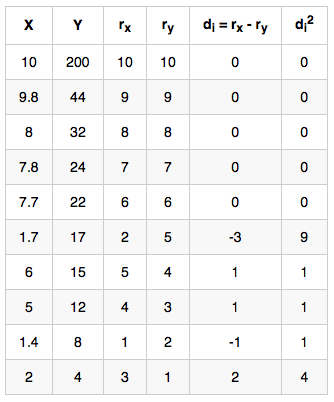

$
r_S = 1 - \frac{6\cdot 16}{10(100 - 1)} = 1 - 0.969696 = 0.90303 \approx 0.903
$

*Code*

In [2]:
n = 10
X = [10, 9.8, 8, 7.8, 7.7, 1.7, 6, 5, 1.4, 2]
Y = [200, 44, 32, 24, 22, 17, 15, 12, 8, 4]

def get_rank(X):
    x_rank = dict((x, i+1) for i, x in enumerate(sorted(set(X))))
    return [x_rank[x] for x in X]

rx = get_rank(X)
ry = get_rank(Y)

d = [(rx[i] - ry[i])**2 for i in range(n)]
rxy = 1 - (6 * sum(d)) / (n * (n**2 - 1))

print('Spearman\'s rank correlation coefficient = {}'.format(round(rxy, 3)))

Spearman's rank correlation coefficient = 0.903
